In [437]:
import xobjects as xo
import xpart as xp
import xcoll as xc
import numpy as np
import xtrack as xt
import pickle
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import *
from madxtools.particles import *
from madxtools.math import *
from cpymad.madx import Madx

from cpymad.madx import Madx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from pybt.tools.plotters import *
from matplotlib.patches import Ellipse, Rectangle
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from madxtools.plot_tool import *


In [438]:
num_part = 1*5000
seed = np.random.randint(low=1, high=int(4e9), size=num_part, dtype=np.uint32)

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.call("fodo.seq")

p, exn, eyn, betx0, bety0, alfx0, alfy0, dx0, dy0, dpx0, dpy0, ex, ey, sige = calc_initial_condition(0.5)

madx.input(f'''
beam, particle=PROTON, pc={p};
use, sequence=fodo;
''')

# madx.input('SEQEDIT, sequence=simple_seq;')
# madx.input(f'MOVE, ELEMENT = OCT1, TO={initial_quad_strength[6]};')
# madx.input('MOVE, ELEMENT = Q1, TO=1, FROM=OCT1;')
# madx.input(f'MOVE, ELEMENT = OCT2, TO={initial_quad_strength[7]};')
# madx.input('MOVE, ELEMENT = Q2, TO=1, FROM=OCT2;')
# madx.input('ENDEDIT;')

madx.use(sequence="fodo")
# madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
# twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()

line = xt.Line.from_madx_sequence(
    sequence=madx.sequence.fodo,
    allow_thick=True,
    enable_align_errors=True,
    deferred_expressions=True,
)
line.particle_ref = xt.Particles(mass0=xt.PROTON_MASS_EV,
                            gamma0=madx.sequence.fodo.beam.gamma)

tw_init = xt.TwissInit(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, dx=dx0, dy=dy0, dpx=dpx0, dpy=dpy0)
tw = line.twiss(method='6d', start="q1", end="fodo$end", init=tw_init)

nemitt_x = exn
nemitt_y = eyn
x_norm, px_norm = xp.generate_2D_gaussian(num_part)
y_norm, py_norm = xp.generate_2D_gaussian(num_part)

Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.


In [439]:
with open('tempfile', 'r') as f:
	lines = f.readlines()
	for ele in lines:
		print('{}'.format(ele))



  ++++++++++++++++++++++++++++++++++++++++++++

  +     MAD-X 5.09.01  (64 bit, Darwin)      +

  + Support: mad@cern.ch, http://cern.ch/mad +

  + Release   date: 2023.12.04               +

  + Execution date: 2024.04.05 10:36:15      +

  ++++++++++++++++++++++++++++++++++++++++++++

//---------------------------- Quadrupoles -------------------------- 



QUAD : QUADRUPOLE, L = 0.01, APERTYPE=CIRCLE, APERTURE={0.1};







//---------------------------- Quadrupoles -------------------------- 



OCT : OCTUPOLE, L = 0.01, APERTYPE=CIRCLE, APERTURE={0.1};











//---------------------------- Multipole -----------------------------







MULT : MULTIPOLE, APERTYPE=CIRCLE, APERTURE={0.1};



    



//---------------------------- Instruments ----------------------------- 



MY_START : INSTRUMENT, L=0.0;



MY_END : INSTRUMENT, L=0.0;







//---------------------------- Strengths ----------------------------- 







! kQ1 = 0.5;



! kQ2 = -0.5;



kf = 10;







kO1 = 0.0;

In [440]:
twiss = madx.twiss()

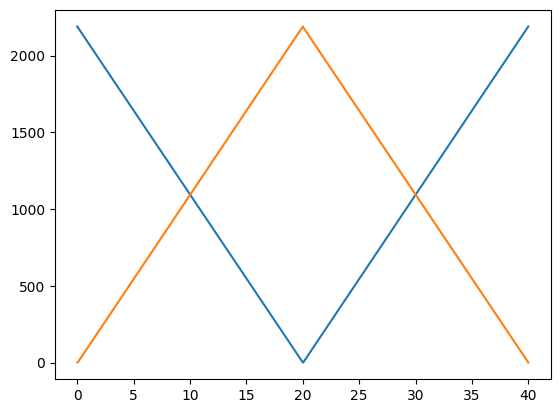

In [441]:
fig, ax = plt.subplots()
ax.plot(twiss.s, twiss.betx)
ax.plot(twiss.s, twiss.bety)

In [442]:
betx0 = twiss.betx[0]
bety0 = twiss.bety[0]
alfx0 = twiss.alfx[0]
alfy0 = twiss.alfy[0]
dx0 = twiss.dx[0]
dy0 = twiss.dy[0]
dpx0 = twiss.dpx[0]
dpy0 = twiss.dpy[0]

In [443]:
print(betx0)
print(bety0)
print(alfx0)
print(alfy0)
print(dx0)
print(dy0)
print(dpx0)
print(dpy0)


2190.306126125786
0.18282065727720256
-109.52443121213197
0.03651453416935186
0.0
-0.0
-0.0
-0.0


In [444]:
f = 10
phi = np.pi/4 #phase advance of the cell

Lcell = np.sin(phi/2)*(4*f)
print(Lcell)

15.307337294603592


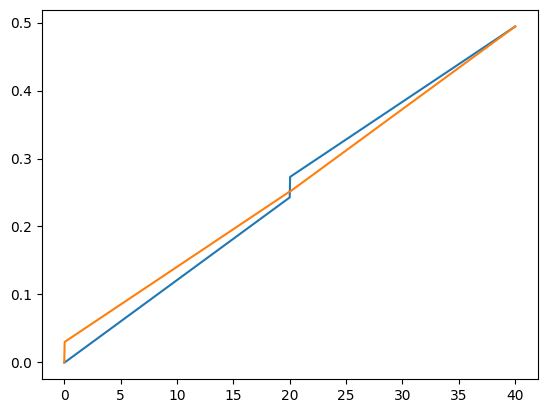

In [445]:
fig, ax = plt.subplots()
ax.plot(twiss.s, twiss.mux)
ax.plot(twiss.s, twiss.muy)

In [446]:
twiss = twiss.dframe()

In [447]:
print(f"{np.abs(twiss.loc['q1'].mux - twiss.loc['q2'].mux):.3f}")

0.251


In [448]:
# Optimising on the FODO cell